# Notebook d'Analyse des données du BAC

**Contexte**

Notre étude porte sur :

#### *l’analyse de l'impact des dernières réformes du baccalauréat au Sénégal sur le taux de réussite au Bac et l’insertion universitaire*.

Ce notebook ce base sur la premier partie de notre étude, à savoir *L'impact des réformes sur le taux de réussite au Bac*. 

**Plan**

- Exploration et préparation des données des résultats du bac de 2006 à 2024
- Visualisation de l'évolution du nombres d'inscrits et du taux de réussite globale, ainsi que par série concernée
- Comparaison du taux de réussite avant et après les réformes
- Modélisation et prédiction de l'évolution du taux de réussite avant et après les réformes 

### Importation des packages nécessaires

In [1]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings from sklearn

In [2]:
import pandas as pd # Manipulation de données
import numpy as np 
import os # Manipulation de fichiers et chemins
from tqdm import tqdm # Affichage de barres de progression

from matplotlib import pyplot as plt # Visualisation de données

### Importation des Données

In [3]:
file_path = os.path.join(os.getcwd(), "data_csv_bac")  # Chemin vers le dossier contenant les fichiers CSV
file = os.listdir(file_path) # Liste des fichiers dans le répertoire

print("liste des fichiers csv des résultats du bac par années :")
for f in file:
    print(f)

liste des fichiers csv des résultats du bac par années :
2006.csv
2007.csv
2008.csv
2009.csv
2010.csv
2011.csv
2012.csv
2013.csv
2014.csv
2015.csv
2016.csv
2017.csv
2018.csv
2019.csv
2020.csv
2021.csv
2022.csv
2023.csv
2024.csv


In [4]:
years = [str(a) for a in range(2006, 2024+1)] # Liste des années

data = {} # Dictionnaire pour stocker les DataFrames

success_files = [] # Liste pour stocker les fichiers chargés avec succès
failed_files = [] # Liste pour stocker les fichiers en erreur

pbr = tqdm(years, desc="Importation des fichiers CSV") # Chargement avec barre de progression
for year in pbr:
    fichier = f"{file_path}/{year}.csv" # Chemin du fichier pour chaque année
    try:
        df = pd.read_csv(fichier, sep=";", encoding="utf-8")  # Charge chaque fichier
        data[year] = df  # Stocke dans le dictionnaire
        success_files.append(year) # Ajoute à la liste des succès
        pbr.set_postfix_str(f"{year}.csv chargé ✅") # Met à jour la barre de progression
    except Exception as e: # Gère les exceptions
        failed_files.append((year, str(e))) # Ajoute à la liste des échecs
        print(f"❌ Erreur inconnue avec {fichier} : {e}") # Affiche l'erreur    

if success_files: 
    print(f"\n✅ Fichiers chargés avec succès ({len(success_files)}):") # Affiche les fichiers chargés
    print(", ".join(success_files)) 

if failed_files:
    print(f"\n❌ Fichiers en erreur ({len(failed_files)}):") # Affiche les fichiers en erreur
    for year, err in failed_files:
        print(f"  - {year}.csv : {err}") 

Importation des fichiers CSV: 100%|██████████| 19/19 [00:04<00:00,  4.44it/s, 2024.csv chargé ✅]


✅ Fichiers chargés avec succès (19):
2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024


### Vérification de l’homogénéité des colonnes dans tous les fichiers

In [5]:
colonnes_reference = set(data["2006"].columns)  # Colonnes de 2006 comme référence
colonnes_identiques = True  # Drapeau pour suivre l'état

for year, df in data.items(): # Parcours des années et vérification des colonnes
    colonnes_actuelles = set(df.columns) # Colonnes actuelles du fichier
    if colonnes_actuelles != colonnes_reference: # Si les colonnes ne correspondent pas
        print(f"⚠️ Les colonnes de {year}.csv sont différentes de celles de 2006.csv")  
        print(f"Colonnes manquantes dans {year}.csv :", colonnes_reference - colonnes_actuelles)
        print(f"Colonnes supplémentaires dans {year}.csv :", colonnes_actuelles - colonnes_reference)
        colonnes_identiques = False 

if colonnes_identiques:
    print("✅ Toutes les colonnes sont identiques dans tous les fichiers.")


✅ Toutes les colonnes sont identiques dans tous les fichiers.


# Nettoyage et Préparation des données  

In [6]:
print("Informations sur le DataFrame de 2006 (Tous les fichiers ont les mêmes colonnes) :")
print("--------------------------------------------------")
data['2006'].info()

Informations sur le DataFrame de 2006 (Tous les fichiers ont les mêmes colonnes) :
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42096 entries, 0 to 42095
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prenom           42095 non-null  object 
 1   nom              42095 non-null  object 
 2   date_nais        42095 non-null  object 
 3   numero_table     42096 non-null  int64  
 4   nationalite      42095 non-null  object 
 5   serie            42095 non-null  object 
 6   sexe             42095 non-null  object 
 7   age              42095 non-null  float64
 8   etablissement    42095 non-null  object 
 9   centre_examen    42095 non-null  object 
 10  m_o_1            28140 non-null  object 
 11  centre_ecrit     41661 non-null  object 
 12  type_candidat    42095 non-null  object 
 13  resultat         40992 non-null  float64
 14  acad_provenance 

### Ajout de la colonne 'year' à chaque DataFrame pour les identifier lors du regroupement

In [7]:

for year, df in data.items():
    df['year'] = str(year)  # Convertit l'année en entier
print("✅ Années ajoutées à chaque DataFrame.")

✅ Années ajoutées à chaque DataFrame.


### Creation du DataFrame regroupant toutes les années

In [8]:
all_data = pd.concat(data.values(), ignore_index=True) # Combine tous les DataFrames en un seul
print("✅ Tous les DataFrames combinés en un seul DataFrame.")

✅ Tous les DataFrames combinés en un seul DataFrame.


In [9]:
print("Informations général du DataFrame :")
print("--------------------------------------------------")
all_data.info()

Informations général du DataFrame :
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236490 entries, 0 to 2236489
Data columns (total 21 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   prenom           object
 1   nom              object
 2   date_nais        object
 3   numero_table     object
 4   nationalite      object
 5   serie            object
 6   sexe             object
 7   age              object
 8   etablissement    object
 9   centre_examen    object
 10  m_o_1            object
 11  centre_ecrit     object
 12  type_candidat    object
 13  resultat         object
 14  acad_provenance  object
 15  acad_ecrit       object
 16  moy_finale       object
 17  mention          object
 18  abs              object
 19  exclusion        object
 20  year             object
dtypes: object(21)
memory usage: 358.3+ MB


## variable choisie pour l'analyse  

In [10]:
colonnes_a_garder = ['nom', 'prenom', 'numero_table', 'serie', 'sexe', 'age', 'etablissement', 'type_candidat',
                     'resultat', 'acad_provenance', 'moy_finale', 'mention', 'abs', 'exclusion', 'year']
all_data_filtre = all_data[colonnes_a_garder]
print("Informations général du DataFrame :")
print("--------------------------------------------------")
all_data_filtre.info()  # Affiche les informations du DataFrame filtré

Informations général du DataFrame :
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236490 entries, 0 to 2236489
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   nom              object
 1   prenom           object
 2   numero_table     object
 3   serie            object
 4   sexe             object
 5   age              object
 6   etablissement    object
 7   type_candidat    object
 8   resultat         object
 9   acad_provenance  object
 10  moy_finale       object
 11  mention          object
 12  abs              object
 13  exclusion        object
 14  year             object
dtypes: object(15)
memory usage: 255.9+ MB


#### Recherche de doublons dans la clé supposée primaire 'numero_table' pour chaque année du bac

In [11]:
print("Numéros en doublons dans le DataFrame combiné par année du bac :")
print("--------------------------------------------------")
for year in all_data_filtre['year'].unique():
    df_year = all_data_filtre[all_data_filtre['year'] == year] # Filtre les données pour l'année en cours
    duplicated_numbers = df_year['numero_table'].value_counts() # Compte les occurrences de chaque numéro
    nb_numeros_en_doublon = (duplicated_numbers >= 2).sum() # Compte les numéros apparaissant au moins deux fois
    print(f"Année {year} : {nb_numeros_en_doublon} numéros apparaissent au moins deux fois") 


Numéros en doublons dans le DataFrame combiné par année du bac :
--------------------------------------------------
Année 2006 : 0 numéros apparaissent au moins deux fois
Année 2007 : 0 numéros apparaissent au moins deux fois
Année 2008 : 371 numéros apparaissent au moins deux fois
Année 2009 : 0 numéros apparaissent au moins deux fois
Année 2010 : 0 numéros apparaissent au moins deux fois
Année 2011 : 1 numéros apparaissent au moins deux fois
Année 2012 : 2 numéros apparaissent au moins deux fois
Année 2013 : 0 numéros apparaissent au moins deux fois
Année 2014 : 0 numéros apparaissent au moins deux fois
Année 2015 : 0 numéros apparaissent au moins deux fois
Année 2016 : 0 numéros apparaissent au moins deux fois
Année 2017 : 0 numéros apparaissent au moins deux fois
Année 2018 : 0 numéros apparaissent au moins deux fois
Année 2019 : 0 numéros apparaissent au moins deux fois
Année 2020 : 0 numéros apparaissent au moins deux fois
Année 2021 : 0 numéros apparaissent au moins deux fois
An

In [12]:
# Spécifie l'année que tu veux examiner
annee_visee = '2012'  # À adapter selon le cas

# Filtrer les données pour l'année donnée
df_year = all_data_filtre[all_data_filtre['year'] == annee_visee]

# Trouver les numéros de table en doublon
duplicated_numbers = df_year['numero_table'].value_counts()
numeros_en_doublon = duplicated_numbers[duplicated_numbers >= 2].index

# Afficher les lignes correspondantes
lignes_doublon = df_year[df_year['numero_table'].isin(numeros_en_doublon)]

# Affichage
print(f"Lignes avec numéros de table apparaissant au moins deux fois pour l’année {annee_visee} :")
lignes_doublon = lignes_doublon[['nom','numero_table','serie','sexe', 'age', 'etablissement','moy_finale']]
lignes_doublon


Lignes avec numéros de table apparaissant au moins deux fois pour l’année 2012 :


,nom,numero_table,serie,sexe,age,etablissement,moy_finale
416877,CISSE,56234,L'1,M,17,LYCEE CHARLES DEGAULLE,"11,00"
416878,KANE,56234,L2,M,21,LYCEE DE ROSS - BETHIO,"07,07"
417134,BOYE,56513,L'1,F,19,LYCEE EL HADJ OMAR FOUTIYOU TALL,"05,58"
417135,CAMARA,56513,L'1,M,23,STRUCTURE D'ENTRE AIDE DU LYCEE EL HADJ OMAR T...,"07,17"


In [13]:
# Générer le code LaTeX du tableau lignes_doublon
latex_code = lignes_doublon.to_latex(index=False)
print(latex_code)

\begin{tabular}{lllllll}
\toprule
nom & numero_table & serie & sexe & age & etablissement & moy_finale \\
\midrule
CISSE & 56234 & L'1 & M & 17 & LYCEE CHARLES DEGAULLE & 11,00 \\
KANE & 56234 & L2 & M & 21 & LYCEE DE ROSS - BETHIO & 07,07 \\
BOYE & 56513 & L'1 & F & 19 & LYCEE EL HADJ OMAR FOUTIYOU TALL & 05,58 \\
CAMARA & 56513 & L'1 & M & 23 & STRUCTURE D'ENTRE AIDE DU LYCEE EL HADJ OMAR TALL DE SAINT LOUIS & 07,17 \\
\bottomrule
\end{tabular}



### Remarque :

On remarque qu’il ne s’agit pas de doublons exacts, mais de personnes différentes à qui le même numéro de table a été attribué.

### Les valeurs manquantes dans les colonnes

#### Lignes où la colonne 'sexe' est manquante

In [14]:
all_data_filtre[all_data_filtre['sexe'].isnull()]

,nom,prenom,numero_table,serie,sexe,age,etablissement,type_candidat,resultat,acad_provenance,moy_finale,mention,abs,exclusion,year
42095,NaN,NaN,42379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
254819,TOP,Rouguiyatou,38574,S2,NaN,23,LYCEE DEMBA DIOP,Officiel,0.0,TH,"07,38",NaN,0,0,2010
254820,TOP,Sylvie,38575,S2,NaN,19,LYCEE DEMBA DIOP,Officiel,0.0,TH,"06,73",NaN,0,0,2010
597189,DIAW,Moth Adam,85290,L-AR,NaN,26,ECOLE PRIVEE FRANCO ARABE DAROU OULIMY DINI,Officiel,0.0,KF,"03,57",NaN,0,0,2014
602946,NDONG,Youssouph,85699,L-AR,NaN,24,INSTITUT PRIVE EL HADJI ABDOULAYE NIASSE,Officiel,0.0,KL,"04,68",NaN,0,0,2014


In [15]:
all_data_filtre.loc[[254819], ['sexe']] = 'F'  # Correction manuelle de la valeur manquante dans sexe pour l'élève avec l'index 254819
all_data_filtre.loc[[254820,597189,602946], ['sexe']] = 'M'  # Correction manuelle de la valeur manquante dans sexe pour les élèves avec les index 254820, 597189, et 602946
print("✅ Valeurs manquantes dans 'sexe' corrigées.")

✅ Valeurs manquantes dans 'sexe' corrigées.


#### Lignes où la colonne 'type_candidat' est manquante

In [16]:
all_data_filtre[all_data_filtre['type_candidat'].isnull()]

,nom,prenom,numero_table,serie,sexe,age,etablissement,type_candidat,resultat,acad_provenance,moy_finale,mention,abs,exclusion,year
42095,NaN,NaN,42379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006
353584,TALL,Mariama,71631,L'1,F,21,CARILLON SCOLAIRE LIMAMOULAYE,NaN,0.0,DK,"00,00",NaN,1,0,2012
361514,TALL,Mariama,102212,L'1,F,21,CARILLON SCOLAIRE LIMAMOULAYE,NaN,0.0,DK,"00,00",NaN,1,0,2012
855375,FAYE,Roky,61214,L'1,F,22,CANDIDAT INDIVIDUEL BAMBEY,NaN,0.0,DL,"-0,42",NaN,0,0,2016
882863,SY,Oumar,86477,S2,M,23,CANDIDAT INDIVIDUEL NGATHIE NAOUDE,NaN,0.0,KL,"07,65",NaN,0,0,2016
892886,SEYE,Dame,51324,L'1,M,35,CANDIDAT INDIVIDUEL DAROU MOUSTY,NaN,101.0,LG,"10,00",PASS,0,0,2016
892892,DIAKHATE,Ndèye Magatte,51330,L'1,F,24,CANDIDAT INDIVIDUEL DAROU MOUSTY,NaN,0.0,LG,"07,04",NaN,0,0,2016
892930,BA,Maye,51368,L'1,F,25,CANDIDAT INDIVIDUEL DE SAGATA GUETT,NaN,111.0,LG,"10,08",PASS,0,0,2016
892935,DIALLO,Hawa,51373,L'1,F,24,CANDIDAT INDIVIDUEL DAROU MOUSTY,NaN,0.0,LG,"07,38",NaN,0,0,2016
892937,DIAW,Laba,51375,L'1,F,23,CANDIDAT INDIVIDUEL DAROU MOUSTY,NaN,101.0,LG,"10,17",PASS,0,0,2016


In [17]:
etabs = ["CARILLON SCOLAIRE LIMAMOULAYE", "INSTITUT AL HAZAR DE NDAME"]

resultat = (
    all_data_filtre[all_data_filtre["etablissement"].isin(etabs)]
    .groupby(["etablissement", "type_candidat"])
    .size()
    .reset_index(name="nombre")
)

resultat


,etablissement,type_candidat,nombre
0,CARILLON SCOLAIRE LIMAMOULAYE,Indiv./Libre,35
1,CARILLON SCOLAIRE LIMAMOULAYE,Officiel,3596
2,INSTITUT AL HAZAR DE NDAME,Officiel,2135


In [18]:
# Liste des établissements pour lesquels on remplace les valeurs vides par "Indiv./Libre"
individuels = [
    "CARILLON SCOLAIRE LIMAMOULAYE",
    "CANDIDAT INDIVIDUEL BAMBEY",
    "CANDIDAT INDIVIDUEL NGATHIE NAOUDE",
    "CANDIDAT INDIVIDUEL DAROU MOUSTY",
    "CANDIDAT INDIVIDUEL DE SAGATA GUETT",
    "CANDIDAT INDIVIDUEL DE SAKAL",
    "CANDIDAT INDIVIDUEL BOUNKILING"
]

# Remplacement par "Indiv./Libre"
all_data_filtre.loc[
    (all_data_filtre["etablissement"].isin(individuels)) & (all_data_filtre["type_candidat"].isna()),
    "type_candidat"
] = "Indiv./Libre"

# Remplacement par "Officiel"
all_data_filtre.loc[
    (all_data_filtre["etablissement"] == "INSTITUT AL HAZAR DE NDAME") & (all_data_filtre["type_candidat"].isna()),
    "type_candidat"
] = "Officiel"


In [19]:
missing_values = all_data_filtre.isnull().sum() # Compte les valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print("--------------------------------------------------")
missing_values

Nombre de valeurs manquantes par colonne :
--------------------------------------------------


nom                     1
prenom                  1
numero_table            3
serie                5442
sexe                    1
age                     1
etablissement           1
type_candidat           1
resultat             3977
acad_provenance         1
moy_finale             11
mention            945553
abs                     1
exclusion               1
year                    0
dtype: int64

In [20]:
# Générer le code LaTeX du tableau lignes_doublon
latex_code = missing_values.to_latex()
print(latex_code)

\begin{tabular}{lr}
\toprule
 & 0 \\
\midrule
nom & 1 \\
prenom & 1 \\
numero_table & 3 \\
serie & 5442 \\
sexe & 1 \\
age & 1 \\
etablissement & 1 \\
type_candidat & 1 \\
resultat & 3977 \\
acad_provenance & 1 \\
moy_finale & 11 \\
mention & 945553 \\
abs & 1 \\
exclusion & 1 \\
year & 0 \\
\bottomrule
\end{tabular}



### Étude de la variable 'moy_final' qui a un type anormale 

#### Lignes où la colonne 'moy_finale' est manquante

In [21]:
all_data_filtre[all_data_filtre['moy_finale'].isnull()][['nom', 'numero_table', 'resultat', 'moy_finale']]

,nom,numero_table,resultat,moy_finale
42095,NaN,42379,NaN,NaN
93927,XXXXXXXX,41803,NaN,NaN
93928,XXXXXXXX,42043,NaN,NaN
105478,XXXXXXXX,27911,NaN,NaN
123225,XXXXXXXX,24635,NaN,NaN
128606,XXXXXXXX,17167,NaN,NaN
129086,XXXXXXXX,17669,NaN,NaN
134300,XXXXXXXX,1054,NaN,NaN
1551937,NDIAYE,NaN,NaN,NaN
1553108,FAYE,NaN,NaN,NaN


In [22]:
# Générer le code LaTeX du tableau lignes_doublon
latex_code = all_data_filtre[all_data_filtre['moy_finale'].isnull()][['nom', 'numero_table', 'resultat', 'moy_finale']].to_latex(index=False)
print(latex_code)

\begin{tabular}{llll}
\toprule
nom & numero_table & resultat & moy_finale \\
\midrule
NaN & 42379 & NaN & NaN \\
XXXXXXXX & 41803 & NaN & NaN \\
XXXXXXXX & 42043 & NaN & NaN \\
XXXXXXXX & 27911 & NaN & NaN \\
XXXXXXXX & 24635 & NaN & NaN \\
XXXXXXXX & 17167 & NaN & NaN \\
XXXXXXXX & 17669 & NaN & NaN \\
XXXXXXXX & 1054 & NaN & NaN \\
NDIAYE & NaN & NaN & NaN \\
FAYE & NaN & NaN & NaN \\
KANE & NaN & NaN & NaN \\
\bottomrule
\end{tabular}



In [23]:
all_data_filtre = all_data_filtre.dropna(subset=['moy_finale']) # supprimer les lignes où 'nom' est NaN 
print("✅ Lignes avec 'moy_finale' NaN supprimées.")

✅ Lignes avec 'moy_finale' NaN supprimées.


In [24]:
print("verification que la ligne des colonnes ne s'est pas répétée dans le DataFrame combiné :")
all_data_filtre[all_data_filtre['moy_finale'] == 'Moy.\nFinale'] 

verification que la ligne des colonnes ne s'est pas répétée dans le DataFrame combiné :


,nom,prenom,numero_table,serie,sexe,age,etablissement,type_candidat,resultat,acad_provenance,moy_finale,mention,abs,exclusion,year
1708152,Nom,Prénom(s),N° Table,Série,Se-\nxe,Age,Etablissement,Type\nCandidat,Resultat,Acad. / Ets.\nProvenance,Moy.\nFinale,Mention,Abs.,Exclu-\nsion,2021


In [25]:
all_data_filtre = all_data_filtre[all_data_filtre['moy_finale'] != 'Moy.\nFinale']
print("✅ la ligne des colonnes répétées bien supprimées.")

✅ la ligne des colonnes répétées bien supprimées.


### Correction du type anormale de la colonne 'moy_finale'

In [26]:
all_data_filtre['moy_finale'] = (
    all_data_filtre['moy_finale']
    .astype(str) # Convertir en chaîne de caractères
    .str.replace('-', '', regex=False) # Supprimer les tirets
    .str.replace(',', '.', regex=False) # Remplacer les virgules par des points
    .str.strip() # Supprimer les espaces en début et fin de chaîne
    .replace({'': None, 'nan': None}) # Remplacer les chaînes vides et 'nan' par None
    .astype(float) # Convertir en float
)
print("✅ Colonne 'moy_finale' bien nettoyée.")
print("---")
print(f"la colonne 'moy_finale' est de type ({all_data_filtre['moy_finale'].dtype}) après nettoyage.")

✅ Colonne 'moy_finale' bien nettoyée.
---
la colonne 'moy_finale' est de type (float64) après nettoyage.


#### Valeurs aberrantes dans la colonne 'moy_finale

In [27]:
all_data_filtre[all_data_filtre['moy_finale'] > 20] # Afficher les lignes avec des moyennes supérieures à 20

,nom,prenom,numero_table,serie,sexe,age,etablissement,type_candidat,resultat,acad_provenance,moy_finale,mention,abs,exclusion,year
1944559,NDIAYE,Fatou Binetou,235216,L2,F,19,ECOLE PRIVEE FALLOU GALASS,Officiel,111.0,DL,3.538641e+49,PASS,0,0,2023


### Remarque :

On remarque qu’il s’agit d’une valeur aberrante. Étant donné que la mention est **Passable**, on coupe la poire en deux en lui attribuant une moyenne de 11.

In [28]:
all_data_filtre.loc[all_data_filtre['moy_finale'] > 20, 'moy_finale'] = 11
print("✅ Les valeurs de 'moy_finale' supérieures à 20 ont été remplacées par 11.")

✅ Les valeurs de 'moy_finale' supérieures à 20 ont été remplacées par 11.


### Étude de la variable 'resultat'

In [29]:
print("Valeurs uniques dans 'resultat' :")
display(all_data_filtre['resultat'].value_counts(dropna=False))
print(f"la colonne 'resultat' est de type ({all_data_filtre['resultat'].dtype})")

Valeurs uniques dans 'resultat' :


resultat
0.0      1180715
101.0     500448
111.0     372289
100.0     146176
000        14871
101         8355
111         7424
NaN         3966
100         1954
10.0         280
Name: count, dtype: int64

la colonne 'resultat' est de type (object)


In [30]:
all_data_filtre['resultat'] = pd.to_numeric(all_data_filtre['resultat'], errors='coerce').astype('Int64')
print("✅ Colonne 'resultat' convertie en entier.")

✅ Colonne 'resultat' convertie en entier.


In [31]:
print("Valeurs uniques dans 'resultat' :")
display(all_data_filtre['resultat'].value_counts(dropna=False))
print(f"le type de la colonne 'resultat' est ({all_data_filtre['resultat'].dtype})")

Valeurs uniques dans 'resultat' :


resultat
0       1195586
101      508803
111      379713
100      148130
<NA>       3966
10          280
Name: count, dtype: Int64

le type de la colonne 'resultat' est (Int64)


- 111 : Ce sont les admis d’office avec mention.
- 101 : Ce sont les admis au second tour.
- 100 : Ce sont ceux qui sont allés au second tour sans réussir.
- 10 : Ce sont ceux qui ont échoué d’office (moyenne des matières dominantes trop faible au premier tour).
- 0 : Ce sont les absents, ceux qui ne se sont pas présentés au second tour ou dont le dossier est incomplet (ils n’ont pas obtenu le bac).

In [32]:
print("les lignes avec 'resultat' est vide :")
all_data_filtre[all_data_filtre['resultat'].isna()]

les lignes avec 'resultat' est vide :


,nom,prenom,numero_table,serie,sexe,age,etablissement,type_candidat,resultat,acad_provenance,moy_finale,mention,abs,exclusion,year
85,DIAKHATE,Maïmouna,456,S2,F,21.0,GROUPE SCOLAIRE LES PEDAGOGUES,Officiel,<NA>,DK,0.00,AJ2,1.0,0.0,2006
133,ZZZZZ CISSE,ZZZZZ Sokhna Astou,653,S2,F,19.0,LYCEE JOHN F KENNEDY,Officiel,<NA>,DK,0.00,PASS,1.0,0.0,2006
223,DIOUF,Fatou Binetou,788,S2,F,21.0,LYCEE JOHN F KENNEDY,Officiel,<NA>,DK,0.00,PASS,1.0,0.0,2006
438,SECK,Yacine,1041,S2,F,24.0,LYCEE JOHN F KENNEDY,Officiel,<NA>,DK,0.00,NaN,1.0,0.0,2006
445,ZZZZZ SIDIBE,ZZZZZ Mame Dieynaba Déguéne,1050,S2,F,19.0,LYCEE JOHN F KENNEDY,Officiel,<NA>,DK,0.00,AJ2,1.0,0.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235908,DIEBAKHATE,Sougouloumba,289407,L2,F,19,LYCEE DE SARAYA,Officiel,<NA>,KG,5.33,NaN,0,1,2024
2235945,DIABY,Mbamoussa,289444,L2,F,22,LYCEE COMMUNAL DE KEDOUGOU,Officiel,<NA>,KG,6.04,NaN,0,1,2024
2236394,CAMARA,Hassana,290693,STIDD,M,20,CENTRE ACADEMIQUE D'ORIENTATION SCOLAIRE ET PR...,Indiv./Libre,<NA>,KG,4.44,NaN,0,1,2024
2236470,KA,Daouda,290769,STIDD,M,19,LYCEE TECHNIQUE INDUSTRIEL DE KEDOUGOU,Officiel,<NA>,KG,6.74,NaN,0,1,2024


### Remarque :

Les candidats avec la colonne 'resultat' vide sont tous des absents ; ils seront donc tous affectés à la valeur 0.

In [33]:
all_data_filtre['resultat'] = all_data_filtre['resultat'].fillna(0) # Remplacer les NaN par 0 dans 'resultat'
print("✅ Valeurs manquantes dans 'resultat' remplacées par 0.")

✅ Valeurs manquantes dans 'resultat' remplacées par 0.


In [34]:
print("Valeurs uniques dans 'resultat' :")
display(all_data_filtre['resultat'].value_counts(dropna=False))
print(f"le type de la colonne 'resultat' est ({all_data['resultat'].dtype})")

Valeurs uniques dans 'resultat' :


resultat
0      1199552
101     508803
111     379713
100     148130
10         280
Name: count, dtype: Int64

le type de la colonne 'resultat' est (object)


In [53]:
missing_values = all_data_filtre.isnull().sum() # Compte les valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print("--------------------------------------------------")
missing_values[missing_values > 0]  # Affiche uniquement les colonnes avec des valeurs manquantes

Nombre de valeurs manquantes par colonne :
--------------------------------------------------


serie        5441
mention    945542
dtype: int64

### Création des colonnes 'admis' et 'session'

In [36]:
all_data_filtre['admis'] = all_data_filtre['resultat'].apply(lambda x: 'admis' if pd.notna(x) and x in [111, 101] else 'non admis')
print("✅ Colonne 'admis' ajoutée avec succès.")

✅ Colonne 'admis' ajoutée avec succès.


In [37]:
all_data_filtre['session'] = all_data_filtre['resultat'].apply(lambda x: '1er Tour' if pd.notna(x) and x == 111 else ('2e Tour' if pd.notna(x) and x == 101 else 'non admis'))
print("✅ Colonne 'session' ajoutée avec succès.")

✅ Colonne 'session' ajoutée avec succès.


### Étude de la variable 'mention'

In [38]:
print("Valeurs uniques dans 'mention' :")
print("--------------------------------------------------")
all_data['mention'].unique() # Affiche les valeurs uniques de la colonne 'mention'

Valeurs uniques dans 'mention' :
--------------------------------------------------


array([nan, 'PASS', 'AJ2', 'AJ', 'ABIEN', 'BIEN', 'TBIEN', 'ABien',
       'Bien', 'Pass', 'Mention', '%£\x05\x0f2SX\x03ùÓ¾W~\x08ð€àp@'],
      dtype=object)

#### Afficher la ou les lignes où la mention est exactement '%£\x05\x0f2SX\x03ùÓ¾W~\x08ð€àp@'

In [39]:
print("Ligne avec mention invalide :")
ligne_mention_invalide = all_data_filtre[all_data_filtre['mention'] == '%£\x05\x0f2SX\x03ùÓ¾W~\x08ð€àp@']
ligne_mention_invalide[['resultat', 'moy_finale', 'mention']]

Ligne avec mention invalide :


,resultat,moy_finale,mention
1944554,111,10.0,%£2SXùÓ¾W~ð€àp@


### Remarque : 
Il doit avoir une mention **passable** en regardant les résultats et les moyennes 

In [40]:
# Remplacement des valeurs dans la colonne 'mention'
all_data_filtre['mention'] = (
    all_data_filtre['mention']
    .replace({'Pass': 'PASS', 'ABien': 'ABIEN', 'Bien': 'BIEN', '%£\x05\x0f2SX\x03ùÓ¾W~\x08ð€àp@' : 'PASS'})
)
print("✅ Colonne 'mention' nettoyée avec succès.")

✅ Colonne 'mention' nettoyée avec succès.


In [41]:
print("Valeurs uniques dans 'mention' :")
print("--------------------------------------------------")
all_data_filtre['mention'].unique()

Valeurs uniques dans 'mention' :
--------------------------------------------------


array([nan, 'PASS', 'AJ2', 'AJ', 'ABIEN', 'BIEN', 'TBIEN'], dtype=object)

In [42]:
all_data_filtre.info()  # Affiche les informations générales du DataFrame combiné

<class 'pandas.core.frame.DataFrame'>
Index: 2236478 entries, 0 to 2236489
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   nom              object 
 1   prenom           object 
 2   numero_table     object 
 3   serie            object 
 4   sexe             object 
 5   age              object 
 6   etablissement    object 
 7   type_candidat    object 
 8   resultat         Int64  
 9   acad_provenance  object 
 10  moy_finale       float64
 11  mention          object 
 12  abs              object 
 13  exclusion        object 
 14  year             object 
 15  admis            object 
 16  session          object 
dtypes: Int64(1), float64(1), object(15)
memory usage: 309.3+ MB


## Création d’un DataFrame récapitulatif annuel pour l’analyse globale du taux de réussite

In [43]:
recap = pd.DataFrame(index=all_data_filtre['year'].unique()) # Initialiser un DataFrame avec les années uniques
recap.index.name = 'year' # Définir l'index du DataFrame
recap = recap.sort_index() # Trier l'index par ordre croissant

# Nombre d'inscrits
recap['nbr_inscrit'] = all_data_filtre.groupby('year').size() 

# Nombre de présents (abs == 0)
recap['nbr_present'] = all_data_filtre[all_data_filtre['abs'] == 0].groupby('year').size()

# Nombre d'admis (tous confondus)
recap['nbr_admis'] = all_data_filtre[all_data_filtre['admis'] == 'admis'].groupby('year').size()

# Nombre d'admis 1er tour
recap['nbr_admis_1er_tour'] = all_data_filtre[
    (all_data_filtre['admis'] == 'admis') & (all_data_filtre['session'] == '1er Tour')
].groupby('year').size()

# Nombre d'admis 2e tour
recap['nbr_admis_2e_tour'] = all_data_filtre[
    (all_data_filtre['admis'] == 'admis') & (all_data_filtre['session'] == '2e Tour')
].groupby('year').size()

# Nombre de mentions
mentions = ['PASS', 'ABIEN', 'BIEN', 'TBIEN']
for mention in mentions:
    recap[f"nbr_m_{mention}"] = all_data_filtre[all_data_filtre['mention'] == mention].groupby('year').size()

# Taux de réussite parmi les présents
recap['taux_admis_(%)'] = (recap['nbr_admis'] / recap['nbr_present']) * 100

# Réinitialiser l'index pour avoir 'year' comme colonne, et la convertir en chaîne
recap = recap.reset_index()
recap['year'] = recap['year'].astype(str)

recap

,year,nbr_inscrit,nbr_present,nbr_admis,nbr_admis_1er_tour,nbr_admis_2e_tour,nbr_m_PASS,nbr_m_ABIEN,nbr_m_BIEN,nbr_m_TBIEN,taux_admis_(%)
0,2006,42095,40741,20411,9125,11286,19702,1056,118,2,50.099408
1,2007,47271,46884,22404,10532,11872,20456,1711,229,8,47.786025
2,2008,49947,49119,20465,7994,12471,19328,1002,132,3,41.664122
3,2009,58165,57456,19960,7173,12787,18990,858,110,4,34.739627
4,2010,72454,71523,29883,13213,16670,27966,1741,173,3,41.780966
5,2011,80583,79302,30110,12479,17631,28325,1617,162,7,37.968778
6,2012,99361,88808,33830,13867,19963,31787,1831,203,9,38.093415
7,2013,109462,108287,41147,19027,22120,38532,2367,233,15,37.998098
8,2014,127766,127442,39638,15348,24290,37236,2121,258,23,31.102776
9,2015,147711,146820,45356,15132,30224,43187,1971,194,4,30.892249


In [44]:
# recap.to_csv("recap.csv") 
print("✅ Récapitulatif des résultats créé avec succès.")

✅ Récapitulatif des résultats créé avec succès.


## Analyse exploratoire des données (EDA)

### Visualisation des données

In [45]:
# Conversion de la colonne 'year' en string dans tous les DataFrames concernés
all_data_filtre['year'] = all_data_filtre['year'].astype(str)

### Évolution du nombre d'inscription et du taux de réussite

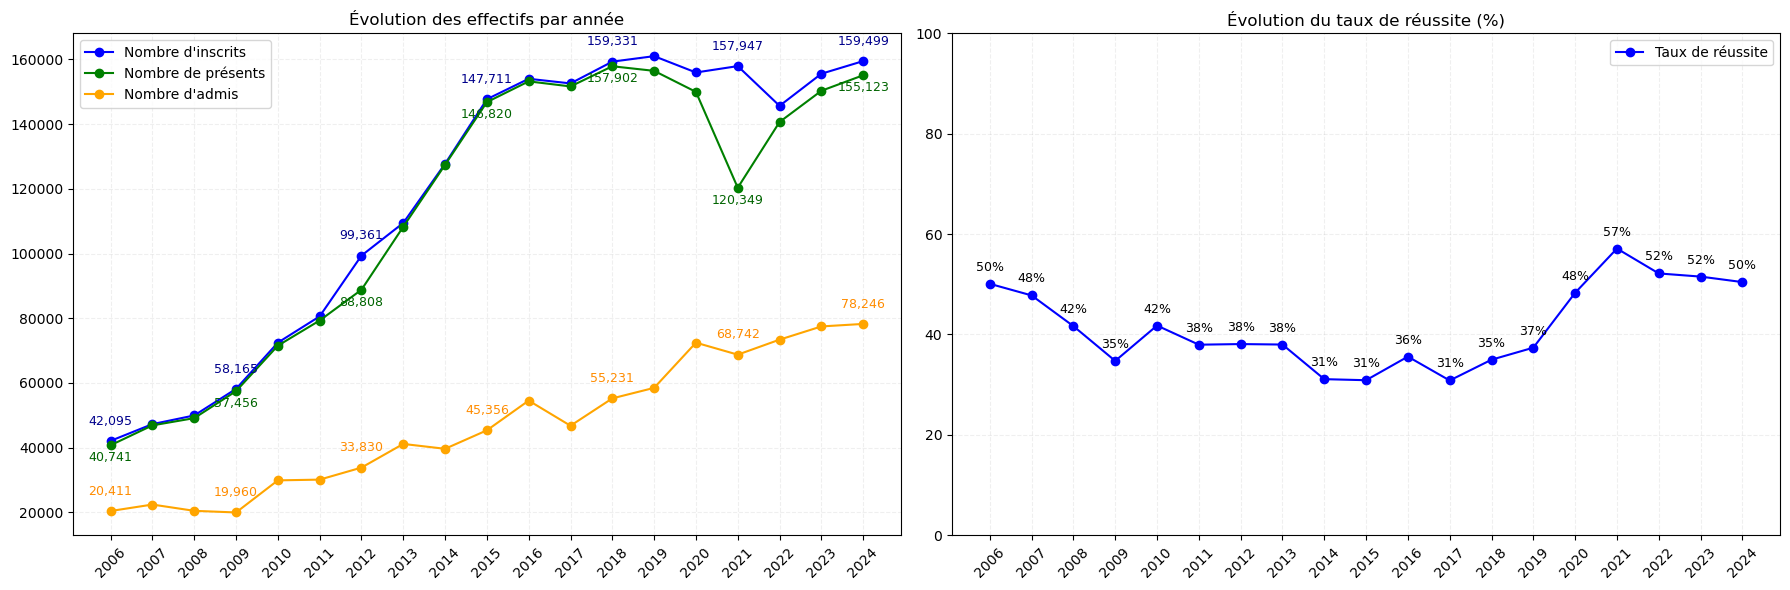

In [46]:
plt.figure(figsize=(18, 6))

# --- Graphique de gauche ---
plt.subplot(1, 2, 1)
plt.plot(recap['year'], recap["nbr_inscrit"], marker='o', color='blue', label="Nombre d'inscrits")
plt.plot(recap['year'], recap["nbr_present"], marker='o', color='green', label="Nombre de présents")
plt.plot(recap['year'], recap["nbr_admis"], marker='o', color='orange', label="Nombre d'admis")

step = max(1, len(recap) // 5) # Calculer le pas pour afficher les étiquettes
for i in range(0, len(recap), step):
    row = recap.iloc[i]
    year = row['year']
    plt.text(year, row['nbr_inscrit'] + 5000, f"{row['nbr_inscrit']:,}", ha='center', fontsize=9, color='darkblue')
    plt.text(year, row['nbr_present'] - 5000, f"{row['nbr_present']:,}", ha='center', fontsize=9, color='darkgreen')
    plt.text(year, row['nbr_admis'] + 5000, f"{row['nbr_admis']:,}", ha='center', fontsize=9, color='darkorange')

plt.title("Évolution des effectifs par année")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

# --- Graphique de droite ---
plt.subplot(1, 2, 2)
plt.plot(recap['year'], recap['taux_admis_(%)'], marker='o', color='b', label='Taux de réussite')

step = max(1, len(recap) // 10) # Calculer le pas pour afficher les étiquettes
for i in range(0, len(recap), step):
    year = recap.loc[i, 'year']
    taux = recap.loc[i, 'taux_admis_(%)']
    plt.text(year, taux + 2, f"{taux:.0f}%", ha='center', va='bottom', fontsize=9)

plt.title("Évolution du taux de réussite (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()


## Figure : Évolution des effectifs et du taux de réussite au baccalauréat au Sénégal (2006–2024)
La figure ci-dessus se compose de deux graphiques juxtaposés, offrant une vue d’ensemble sur les dynamiques du baccalauréat au Sénégal entre 2006 et 2024.

### Évolution des effectifs (graphique de gauche)

La figure illustre l’évolution du nombre d’inscrits, de présents, et d’admis au baccalauréat entre 2006 et 2024. Deux phases distinctes se dégagent :

- **2006–2015 : Croissance exponentielle des inscrits**
    - Le nombre d’inscrits et de présents a connu une forte croissance entre 2006 et 2015,passant d'environ **$42 000$ (2006) à $150 000$ (2015)**, soit une hausse de **$250 \%$** en 9 ans.
    - Les admis suivent une progression mais moins marquée : **$20 000$ → $45 000$ ($+125 \%$)**.
- **2015-2024 : Stabilisation relative des inscrits**
    - Les effectifs oscillent autour de **$150 000$–$160 00$**, avec des variations mineures (une baisse importante des présents est observée en 2020-2021, sans doute en lien avec **la pandémie du COVID-19**)
    - Les admis suivent leur légère progression mais toujours moins marquant

### Taux de réussite

Ce graphique illustre l'évolution du taux de réussite (%) au bac parmi les présents :

- Le taux varie fortement d'une année à l'autre.
- Une baisse marquée est visible entre 2006 et 2017, atteignant un minimum de **$31 \%$** en 2013, 2014 ainsi qu'en 2017 après une légère hausse en 2016.
- À partir de 2017, une nette remontée est observée, avec un pic à **$57 \%$** en 2021, probablement dû à des ajustements liés à la crise sanitaire.
- mais à partir de 2021, on remarque le légère baisse jusqu'à **$50 \%$**

### Remarque

Toutefois, ces taux demeurent préoccupants lorsqu’on les compare à ceux observés dans des pays comme la France ou le Canada, où le taux de réussite au baccalauréat oscille généralement autour de 90 %.

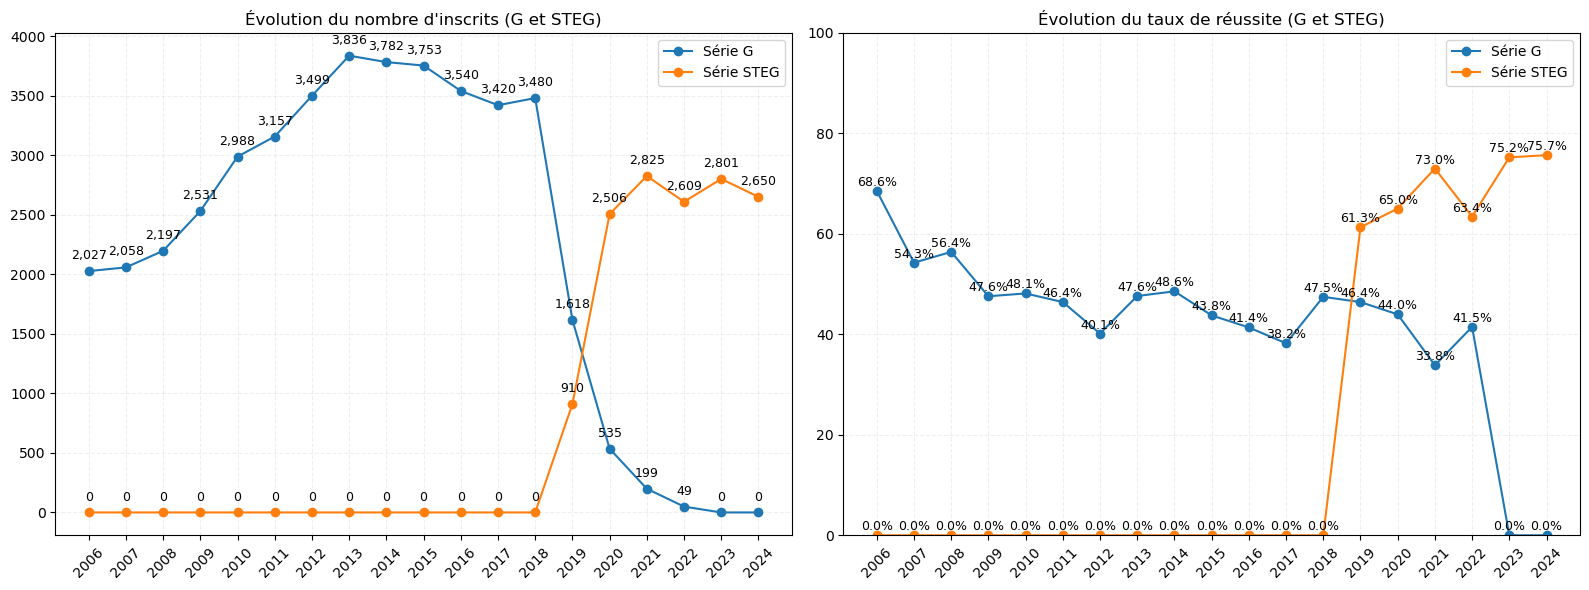

In [47]:
series_g_steg = ["G", "STEG"]

# Préparer les données pour le nombre d'inscrits
inscrits_g_steg = (
    all_data_filtre[all_data_filtre['serie'].isin(series_g_steg)]
    .groupby(['year', 'serie'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=series_g_steg)
).reset_index()

# Préparer les données pour le taux de réussite (présents uniquement)
taux_admis_g_steg = (
    all_data_filtre[(all_data_filtre['serie'].isin(series_g_steg)) & (all_data_filtre['abs'] == 0)]
    .groupby(['year', 'serie'])['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .unstack(fill_value=0)
    .reindex(columns=series_g_steg)
).reset_index()

# Création des sous-graphes
plt.figure(figsize=(16, 6))

# Graphe 1 : Nombre d'inscrits
plt.subplot(1, 2, 1)
for serie in series_g_steg:
    plt.plot(inscrits_g_steg['year'], inscrits_g_steg[serie], marker='o', label=f"Série {serie}")
    step = max(1, len(inscrits_g_steg) // 10)
    for i in range(0, len(inscrits_g_steg), step):
        plt.text(inscrits_g_steg.loc[i, 'year'], inscrits_g_steg.loc[i, serie] + 100,
                 f"{inscrits_g_steg.loc[i, serie]:,}", ha='center', fontsize=9)
plt.title("Évolution du nombre d'inscrits (G et STEG)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

# Graphe 2 : Taux de réussite
plt.subplot(1, 2, 2)
for serie in series_g_steg:
    plt.plot(taux_admis_g_steg['year'], taux_admis_g_steg[serie], marker='o', label=f"Série {serie}")
    step = max(1, len(taux_admis_g_steg) // 10)
    for i in range(0, len(taux_admis_g_steg), step):
        plt.text(taux_admis_g_steg.loc[i, 'year'], taux_admis_g_steg.loc[i, serie] + 1,
                 f"{taux_admis_g_steg.loc[i, serie]:.1f}%", ha='center', fontsize=9)
plt.title("Évolution du taux de réussite (G et STEG)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()


### Analyse de la transition entre les séries G et STEG suite à la réforme de 2019

La figure met en évidence l’impact de la réforme de 2019, qui a introduit la série STEG en remplacement progressif de la série G, conformément au décret officiel prévoyant leur coexistence temporaire.

- À partir de 2019, la série STEG est introduite avec **succès**, affichant dès sa première année un taux de réussite de **$61,3 \%$**, nettement supérieur à celui de la série G, qui était **$47,5 \%$** la année  d'avant.

- Les performances de la série STEG restent systématiquement meilleures, atteignant **$75,7 \%$** en 2024.

Ces résultats suggèrent que la réforme a non seulement été bien planifiée, mais aussi efficace sur le plan pédagogique, avec des taux de réussite significativement plus élevés pour les candidats de la nouvelle série STEG.

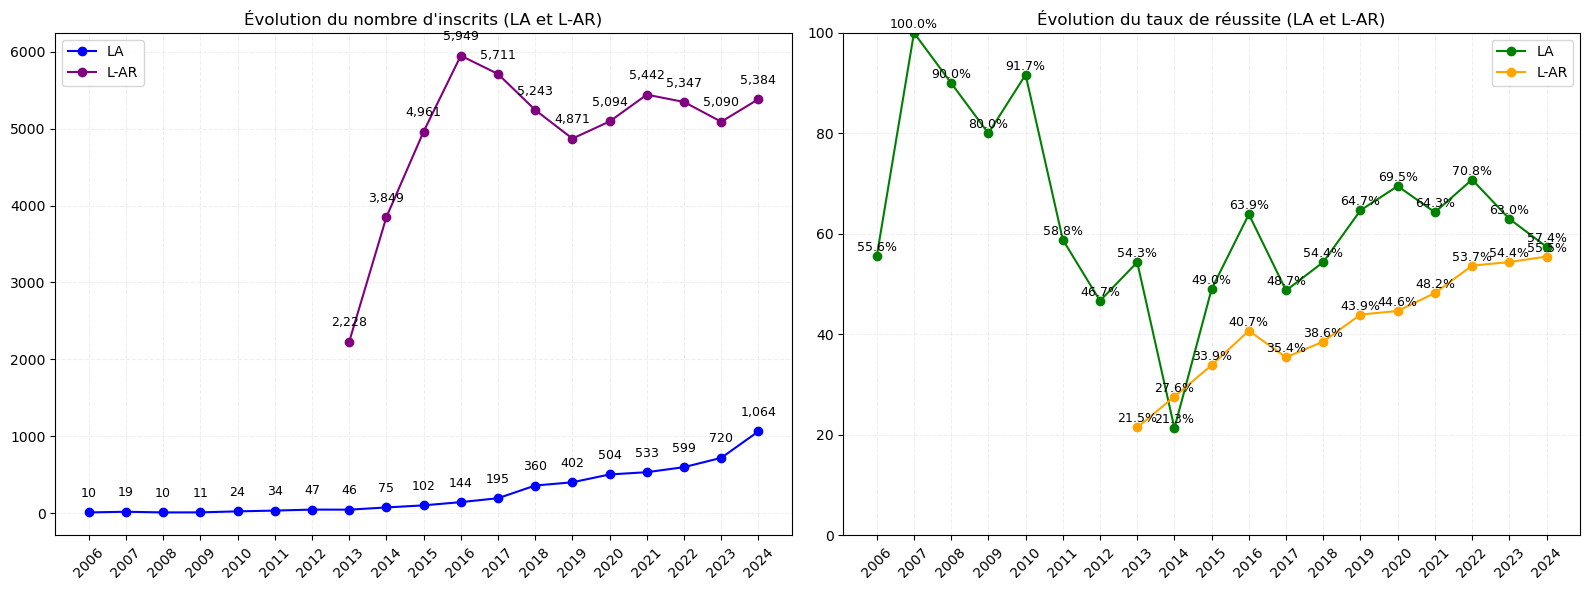

In [48]:
series = ["LA", "L-AR"] # Séries concernées

# Filtrer et grouper les inscrits
inscrits_series = (
    all_data_filtre[all_data_filtre['serie'].isin(series)]
    .groupby(['year', 'serie'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=series)
    .sort_index()
)

# Filtrer et grouper le taux de réussite (présents uniquement)
taux_reussite_series = (
    all_data_filtre[(all_data_filtre['serie'].isin(series)) & (all_data_filtre['abs'] == 0)]
    .groupby(['year', 'serie'])['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .unstack(fill_value=0)
    .reindex(columns=series)
    .sort_index()
)

# Définir les années à annoter
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

# === Création de la figure ===
plt.figure(figsize=(16, 6))

# === Graphe 1 : Évolution des inscrits ===
plt.subplot(1, 2, 1)
plt.plot(inscrits_series.index, inscrits_series['LA'], marker='o', label='LA', color='blue')
lar_mask = inscrits_series['L-AR'] > 0
plt.plot(inscrits_series.index[lar_mask], inscrits_series['L-AR'][lar_mask], marker='o', label='L-AR', color='purple')

# Ajouter les étiquettes
for year in year_label:
    plt.text(year, inscrits_series.loc[year, 'LA'] + 200, f"{inscrits_series.loc[year, 'LA']:,}", ha='center', fontsize=9)
    if lar_mask.loc[year]:
        plt.text(year, inscrits_series.loc[year, 'L-AR'] + 200, f"{inscrits_series.loc[year, 'L-AR']:,}", ha='center', fontsize=9)

plt.title("Évolution du nombre d'inscrits (LA et L-AR)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper left')

# === Graphe 2 : Évolution du taux de réussite ===
plt.subplot(1, 2, 2)
plt.plot(taux_reussite_series.index, taux_reussite_series['LA'], marker='o', label='LA', color='green')
lar_mask2 = taux_reussite_series['L-AR'] > 0
plt.plot(taux_reussite_series.index[lar_mask2], taux_reussite_series['L-AR'][lar_mask2], marker='o', label='L-AR', color='orange')

# Ajouter les étiquettes
for year in year_label:
    plt.text(year, taux_reussite_series.loc[year, 'LA'] + 1, f"{taux_reussite_series.loc[year, 'LA']:.1f}%", ha='center', fontsize=9)
    if lar_mask2.loc[year]:
        plt.text(year, taux_reussite_series.loc[year, 'L-AR'] + 1, f"{taux_reussite_series.loc[year, 'L-AR']:.1f}%", ha='center', fontsize=9)

plt.title("Évolution du taux de réussite (LA et L-AR)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Analyse de la figure : Évolution des inscriptions et taux de réussite

La figure se compose de deux graphiques qui illustrent l'évolution des inscriptions et des taux de réussite pour deux séries : LA (Langue Franco-Arabe) et L-AR (Langue Arabe Réformée) entre 2006 et 2024.

### Évolution des effectifs
- la série LA, Affiche une croissance constante à partir de 2011, atteignant des valeurs significatives jusqu'en 2024 avec 720 inscrits 
- la série L-AR, Montre une augmentation marquée entre 2006 et 2016, avec une photo de 5 711 inscrits. Après 2016, il y a une fluctuation dans le nombre d'inscrits, se stabilisant autour de 5 000 depuis 2018 jusqu'en 2024.

### Taux de réussite
- Le taux de réussite de la série LA varie considérablement, atteignant un pic de 100% en 2006 puis affichant des fluctuations avec un minimum de 21,5% en 2015.
- La série L-AR, Commence avec un taux de 56,7% en 2006 et montre une tendance somme toute ascendante , avec des variations mais atteignant 54,5% en 2024 .

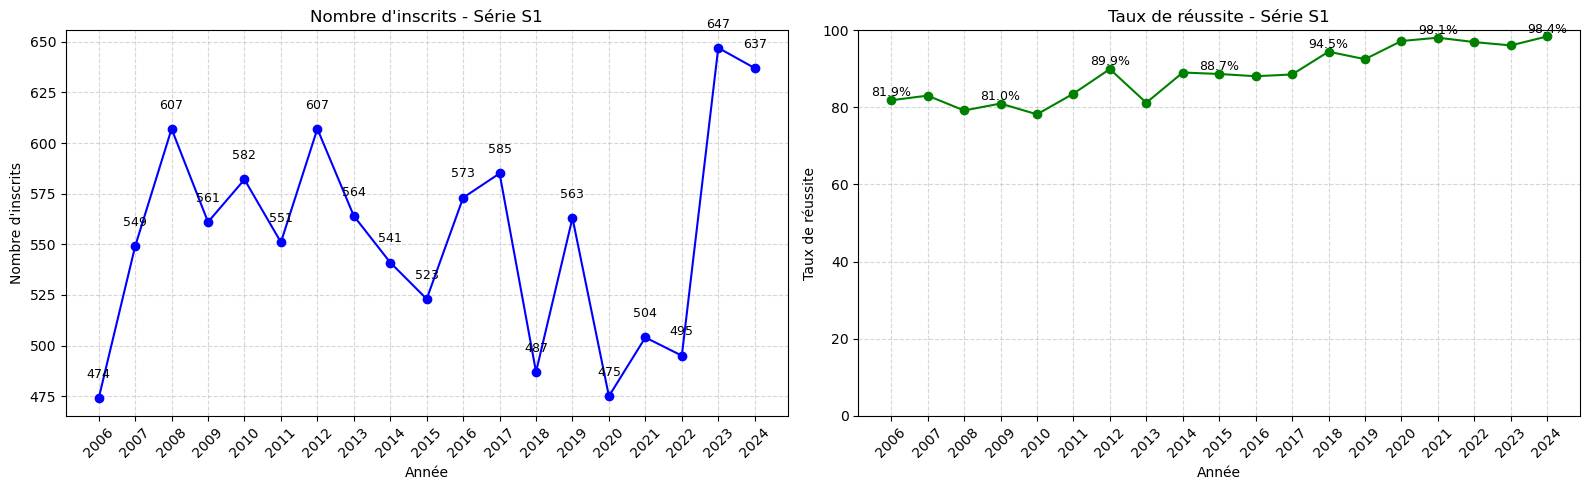

In [49]:
# Exemple pour une série (par ex. S1)

serie = "S1"

inscrits_series = (
    all_data_filtre[all_data_filtre['serie'] == serie]
    .groupby('year')
    .size()
    .reset_index(name='inscrits')
)

# Calculer le pas pour afficher environ 10 étiquettes max (ou 25% des points)
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

plt.figure(figsize=(16, 5))

# Graphe nombre d'inscrits
plt.subplot(1, 2, 1)
plt.plot(inscrits_series['year'], inscrits_series['inscrits'], marker='o', color='blue')

# Affichage étiquettes limité
for i in year_label:
    plt.text(inscrits_series.loc[i, 'year'], inscrits_series.loc[i, 'inscrits'] + 10,
             f"{inscrits_series.loc[i, 'inscrits']:,}", ha='center', fontsize=9)

plt.title(f"Nombre d'inscrits - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Nombre d'inscrits")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Taux de réussite
taux_reussite_series = (
    all_data_filtre[(all_data_filtre['serie'] == serie) & (all_data_filtre['abs'] == 0)]
    .groupby('year')['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .reset_index(name='taux_reussite')
)

plt.subplot(1, 2, 2)
plt.plot(taux_reussite_series['year'], taux_reussite_series['taux_reussite'], marker='o', color='green')

# Étiquettes limitées pour taux de réussite
every_n_tr = max(1, len(taux_reussite_series) // 5)
year_label_tr = taux_reussite_series.index[::every_n_tr]

for i in year_label_tr:
    plt.text(taux_reussite_series.loc[i, 'year'], taux_reussite_series.loc[i, 'taux_reussite'] + 1,
             f"{taux_reussite_series.loc[i, 'taux_reussite']:.1f}%", ha='center', fontsize=9)

plt.title(f"Taux de réussite - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Taux de réussite")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


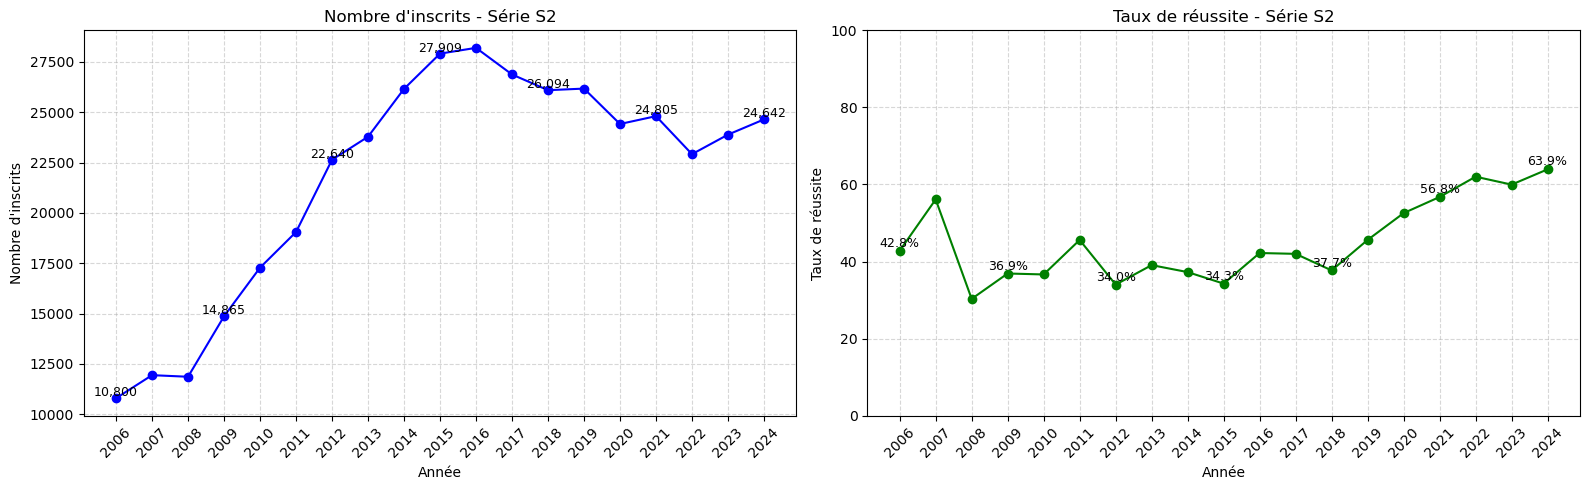

In [50]:
# Exemple pour une série (par ex. S1)

serie = "S2"

inscrits_series = (
    all_data_filtre[all_data_filtre['serie'] == serie]
    .groupby('year')
    .size()
    .reset_index(name='inscrits')
)

# Calculer le pas pour afficher environ 10 étiquettes max (ou 25% des points)
every_n = max(1, len(inscrits_series) // 5)
year_label = inscrits_series.index[::every_n]

plt.figure(figsize=(16, 5))

# Graphe nombre d'inscrits
plt.subplot(1, 2, 1)
plt.plot(inscrits_series['year'], inscrits_series['inscrits'], marker='o', color='blue')

# Affichage étiquettes limité
for i in year_label:
    plt.text(inscrits_series.loc[i, 'year'], inscrits_series.loc[i, 'inscrits'] + 100,
             f"{inscrits_series.loc[i, 'inscrits']:,}", ha='center', fontsize=9)

plt.title(f"Nombre d'inscrits - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Nombre d'inscrits")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Taux de réussite
taux_admis_series = (
    all_data_filtre[(all_data_filtre['serie'] == serie) & (all_data_filtre['abs'] == 0)]
    .groupby('year')['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .reset_index(name='taux_admis')
)

plt.subplot(1, 2, 2)
plt.plot(taux_admis_series['year'], taux_admis_series['taux_admis'], marker='o', color='green')

# Étiquettes limitées pour taux de réussite
every_n_tr = max(1, len(taux_admis_series) // 5)
year_label_tr = taux_admis_series.index[::every_n_tr]

for i in year_label_tr:
    plt.text(taux_admis_series.loc[i, 'year'], taux_admis_series.loc[i, 'taux_admis'] + 1,
             f"{taux_admis_series.loc[i, 'taux_admis']:.1f}%", ha='center', fontsize=9)

plt.title(f"Taux de réussite - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Taux de réussite")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


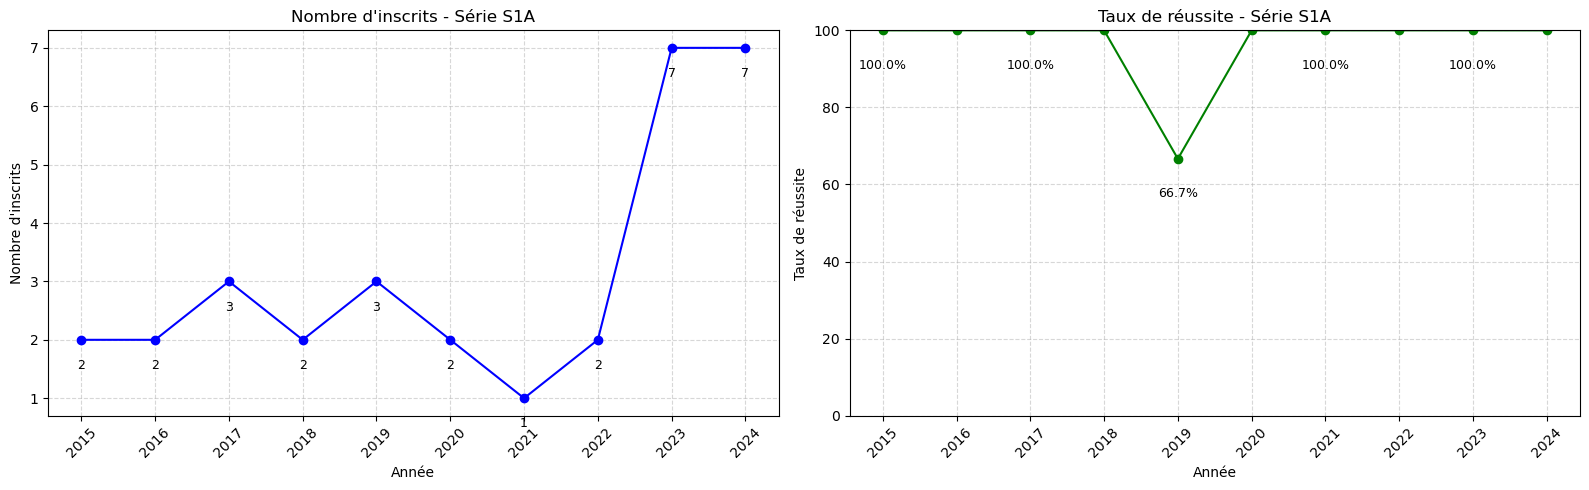

In [51]:
# Exemple pour une série (par ex. S1)

serie = "S1A"

inscrits_series = (
    all_data_filtre[all_data_filtre['serie'] == serie]
    .groupby('year')
    .size()
    .reset_index(name='inscrits')
)

# Calculer le pas pour afficher environ 10 étiquettes max (ou 25% des points)
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

plt.figure(figsize=(16, 5))

# Graphe nombre d'inscrits
plt.subplot(1, 2, 1)
plt.plot(inscrits_series['year'], inscrits_series['inscrits'], marker='o', color='blue')

# Affichage étiquettes limité
for i in year_label:
    plt.text(inscrits_series.loc[i, 'year'], inscrits_series.loc[i, 'inscrits'] - 0.5,
             f"{inscrits_series.loc[i, 'inscrits']:,}", ha='center', fontsize=9)

plt.title(f"Nombre d'inscrits - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Nombre d'inscrits")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Taux de réussite
taux_admis_series = (
    all_data_filtre[(all_data_filtre['serie'] == serie) & (all_data['abs'] == 0)]
    .groupby('year')['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .reset_index(name='taux_admis')
)

plt.subplot(1, 2, 2)
plt.plot(taux_admis_series['year'], taux_admis_series['taux_admis'], marker='o', color='green')

# Étiquettes limitées pour taux de réussite
every_n_tr = max(1, len(taux_admis_series) // 5)
year_label_tr = taux_admis_series.index[::every_n_tr]

for i in year_label_tr:
    plt.text(taux_admis_series.loc[i, 'year'], taux_admis_series.loc[i, 'taux_admis'] - 10,
             f"{taux_admis_series.loc[i, 'taux_admis']:.1f}%", ha='center', fontsize=9)

plt.title(f"Taux de réussite - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Taux de réussite")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


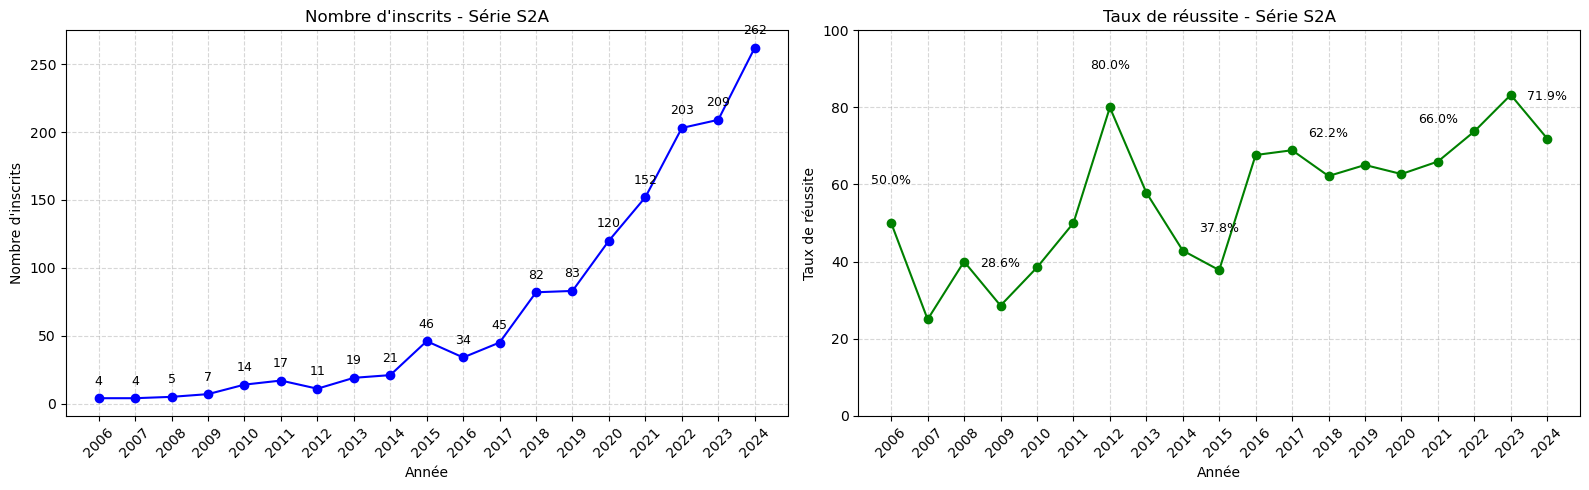

In [52]:
# Exemple pour une série (par ex. S1)

serie = "S2A"

inscrits_series = (
    all_data_filtre[all_data_filtre['serie'] == serie]
    .groupby('year')
    .size()
    .reset_index(name='inscrits')
)

# Calculer le pas pour afficher environ 10 étiquettes max (ou 25% des points)
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

plt.figure(figsize=(16, 5))

# Graphe nombre d'inscrits
plt.subplot(1, 2, 1)
plt.plot(inscrits_series['year'], inscrits_series['inscrits'], marker='o', color='blue')

# Affichage étiquettes limité
for i in year_label:
    plt.text(inscrits_series.loc[i, 'year'], inscrits_series.loc[i, 'inscrits'] + 10,
             f"{inscrits_series.loc[i, 'inscrits']:,}", ha='center', fontsize=9)

plt.title(f"Nombre d'inscrits - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Nombre d'inscrits")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Taux de réussite
taux_admis_series = (
    all_data_filtre[(all_data_filtre['serie'] == serie) & (all_data_filtre['abs'] == 0)]
    .groupby('year')['admis']
    .apply(lambda x: (x == 'admis').mean() * 100)
    .reset_index(name='taux_admis')
)

plt.subplot(1, 2, 2)
plt.plot(taux_admis_series['year'], taux_admis_series['taux_admis'], marker='o', color='green')

# Étiquettes limitées pour taux de réussite
every_n_tr = max(1, len(taux_admis_series) // 5)
year_label_tr = taux_admis_series.index[::every_n_tr]

for i in year_label_tr:
    plt.text(taux_admis_series.loc[i, 'year'], taux_admis_series.loc[i, 'taux_admis'] + 10,
             f"{taux_admis_series.loc[i, 'taux_admis']:.1f}%", ha='center', fontsize=9)

plt.title(f"Taux de réussite - Série {serie}")
plt.xlabel("Année")
plt.ylabel("Taux de réussite")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
